In [36]:
import cv2

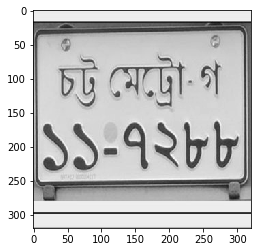

In [3]:
from skimage.measure import find_contours
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

orig_img = imread('1.jpg')
gray_img = rgb2gray(orig_img)
plt.imshow(gray_img,interpolation='nearest', cmap=plt.cm.gray)

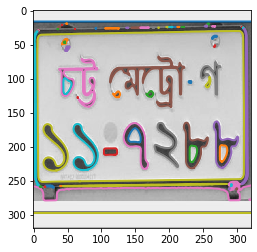

In [7]:
contours = find_contours(gray_img)

fig, ax = plt.subplots()
ax.imshow(gray_img, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contours[n][:, 1], contours[n][:, 0], linewidth=2)

plt.show()

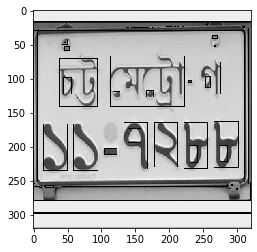

In [8]:
import numpy as np
from skimage.draw import polygon_perimeter

bounding_boxes = []

for contour in contours:
    Xmin = np.min(contour[:,0])
    Xmax = np.max(contour[:,0])
    Ymin = np.min(contour[:,1])
    Ymax = np.max(contour[:,1])
    
    bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])


with_boxes  = np.copy(gray_img)

for box in bounding_boxes:
    #[Xmin, Xmax, Ymin, Ymax]
    r = [box[0],box[1],box[1],box[0], box[0]]
    c = [box[3],box[3],box[2],box[2], box[3]]
    rr, cc = polygon_perimeter(r, c, with_boxes.shape)
    with_boxes[rr, cc] = 0 #set color black

plt.imshow(with_boxes, interpolation='nearest', cmap=plt.cm.gray)
plt.show()

In [22]:
def area(Xmin, Xmax, Ymin, Ymax):
    return((Xmax-Xmin)*(Ymax-Ymin))

8066
74 109


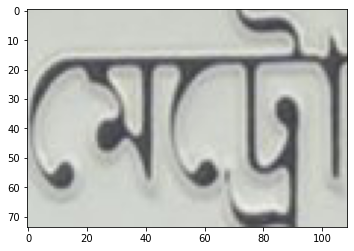

4047
71 57


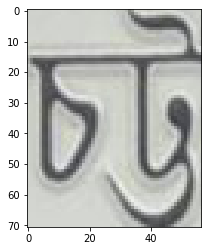

1344
48 28


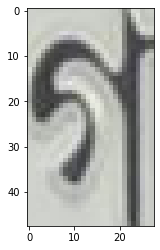

2380
68 35


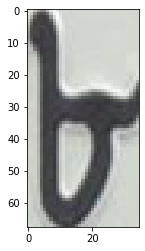

2345
67 35


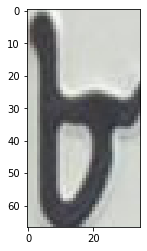

2412
67 36


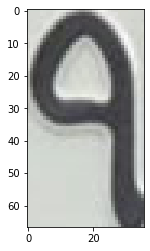

2176
64 34


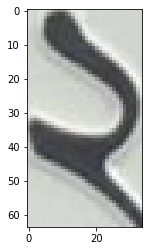

2484
69 36


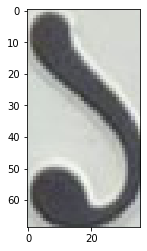

2448
68 36


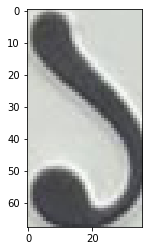

In [37]:
for i, box in enumerate(bounding_boxes):
    Xmin, Xmax, Ymin, Ymax = [int(x) for x in box]
    height = Xmax-Xmin
    width = Ymax-Ymin
    area_box = area(Xmin, Xmax, Ymin, Ymax)
    if area_box < 1000 or area_box>10000 or width<20 or width>150:
        continue
    print(area_box)
    print(height, width)
    box_image = orig_img[Xmin:Xmax, Ymin:Ymax]
    plt.imshow(box_image)
    plt.show()
    cv2.imwrite('outputs/'+str(i)+'.jpg', box_image)
    